# *DESAFIO 1*

- #### Como primer medida vamos a importar las librerías que vamos a utilizar a lo largo de la notebook, y todas las herramientas que creamos necesarias. 

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

%matplotlib inline

- #### El siguiente paso es importar el Dataset y comenzar a revisarlo

In [58]:
data_location = 'C:/Users/USUARIO/Desktop/Digital House - DS/Data Sets/properatti.csv'
data = pd.read_csv(data_location)

data_final = data[['property_type','place_name','place_with_parent_names','state_name','lat-lon','lon','lat','price','currency','price_aprox_usd',
                         'surface_total_in_m2','surface_covered_in_m2','price_per_m2','rooms','description','title']].copy()

In [59]:
data_final.dtypes

property_type               object
place_name                  object
place_with_parent_names     object
state_name                  object
lat-lon                     object
lon                        float64
lat                        float64
price                      float64
currency                    object
price_aprox_usd            float64
surface_total_in_m2        float64
surface_covered_in_m2      float64
price_per_m2               float64
rooms                      float64
description                 object
title                       object
dtype: object

In [60]:
print(data_final.isnull().sum() / data_final.shape[0], '\n')

property_type              0.000000
place_name                 0.000190
place_with_parent_names    0.000000
state_name                 0.000000
lat-lon                    0.425260
lon                        0.425260
lat                        0.425260
price                      0.168372
currency                   0.168380
price_aprox_usd            0.168372
surface_total_in_m2        0.324435
surface_covered_in_m2      0.164222
price_per_m2               0.276869
rooms                      0.609058
description                0.000016
title                      0.000000
dtype: float64 



- #### Miramos si hay valores duplicados. En caso de que los haya, los eliminamos

In [61]:
duplicados = data_final.duplicated()
print(duplicados.shape[0])
print(duplicados.sum())
print('----')

data_final.loc[duplicados].head(40)
data_final.drop_duplicates(inplace=True)

print(data_final.shape[0])

121220
5251
----
115969


- #### *Investigamos la columna price_aprox_usd*

In [62]:
print('Tamaño columna price --->', data_final['price_aprox_usd'].shape[0], '\n')
print('Valores nulos columna price --->', data_final['price_aprox_usd'].isnull().sum(), '\n')
print('Valores NO nulos columna price --->', data_final['price_aprox_usd'].notnull().sum(), '\n')
print(data_final['price_aprox_usd'].describe(), '\n')

Tamaño columna price ---> 115969 

Valores nulos columna price ---> 17435 

Valores NO nulos columna price ---> 98534 

count    9.853400e+04
mean     2.408766e+05
std      3.936819e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.450000e+05
75%      2.680000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64 



- #### *Investigamos la columna property_type*

In [63]:
data_final['property_type'].value_counts()

apartment    66519
house        39761
PH            5618
store         4071
Name: property_type, dtype: int64

In [64]:
data_final['property_type'].describe()

count        115969
unique            4
top       apartment
freq          66519
Name: property_type, dtype: object

In [183]:
price_aprox_usd = data_final['price_aprox_usd']
property_type_PH = data_final['property_type'] == 'PH' 
PH_price = data_final.loc[property_type_PH, 'price_aprox_usd']

property_type_apartment = data_final['property_type'] == 'apartment' 
apartment_price = data_final.loc[property_type_apartment, 'price_aprox_usd']

property_type_house = data_final['property_type'] == 'house' 
house_price = data_final.loc[property_type_house, 'price_aprox_usd']

property_type_store = data_final['property_type'] == 'store' 
store_price = data_final.loc[property_type_store, 'price_aprox_usd']

In [184]:
print('Cantidad de nulos en PH --->', PH_price.isnull().sum() / PH_price.shape[0] , '\n')
print('Cantidad de nulos en apartment --->', apartment_price.isnull().sum() / apartment_price.shape[0] , '\n')
print('Cantidad de nulos en house --->', house_price.isnull().sum() / house_price.shape[0] , '\n')
print('Cantidad de nulos en store --->', store_price.isnull().sum() / store_price.shape[0] , '\n')

Cantidad de nulos en PH ---> 0.08063367746529014 

Cantidad de nulos en apartment ---> 0.13295449420466332 

Cantidad de nulos en house ---> 0.18321973793415658 

Cantidad de nulos en store ---> 0.20953082780643575 



- #### Cantidad de outliers para PH 

In [185]:
PH_price.describe()

count    5.165000e+03
mean     1.478223e+05
std      1.495628e+05
min      5.047530e+03
25%      8.500000e+04
50%      1.200000e+05
75%      1.650000e+05
max      2.800000e+06
Name: price_aprox_usd, dtype: float64

In [186]:
print(PH_price.shape[0])
print(PH_price.notnull().sum())

price_aprox_usd_ph_alto = PH_price > 165000
cantidad_outliers_ph = price_aprox_usd_ph_alto.sum()
print('Cantidad outliers PH --->', cantidad_outliers_ph)

5618
5165
Cantidad outliers PH ---> 1284


In [187]:
porcentaje_outliers_PH = cantidad_outliers_ph / PH_price.notnull().sum()
print('Porcentaje outliers PH --->', porcentaje_outliers_PH)

Porcentaje outliers PH ---> 0.24859632139399807


- #### Cantidad de outliers para Apartment 

In [188]:
apartment_price.describe()

count    5.767500e+04
mean     1.883022e+05
std      3.188218e+05
min      4.666620e+03
25%      8.000000e+04
50%      1.199000e+05
75%      1.930000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [189]:
print(apartment_price.shape[0])
print(apartment_price.notnull().sum())

price_aprox_usd_apartment_alto = apartment_price > 193000
cantidad_outliers_apartment = price_aprox_usd_apartment_alto.sum()
print('Cantidad outliers apartment --->', cantidad_outliers_apartment)

66519
57675
Cantidad outliers apartment ---> 14408


In [190]:
porcentaje_outliers_apartment = cantidad_outliers_apartment / apartment_price.notnull().sum()
print('Porcentaje outliers Apartment --->', porcentaje_outliers_apartment)

Porcentaje outliers Apartment ---> 0.24981361074989164


- #### Cantidad de outliers para House

In [191]:
house_price.describe()

count    3.247600e+04
mean     3.293719e+05
std      4.586008e+05
min      0.000000e+00
25%      1.400000e+05
50%      2.400000e+05
75%      3.800000e+05
max      2.500000e+07
Name: price_aprox_usd, dtype: float64

In [192]:
print(house_price.shape[0])
print(house_price.notnull().sum())

price_aprox_usd_house_alto = house_price > 380000
cantidad_outliers_house = price_aprox_usd_house_alto.sum()
print('Cantidad outliers house', cantidad_outliers_house)

39761
32476
Cantidad outliers house 8115


In [193]:
porcentaje_outliers_house = cantidad_outliers_house / house_price.notnull().sum()
print('Porcentaje outliers house --->', porcentaje_outliers_house)

Porcentaje outliers house ---> 0.24987683212218254


- #### Cantidad de outliers para Store

In [194]:
store_price.describe()

count    3.218000e+03
mean     4.394095e+05
std      7.640450e+05
min      4.952450e+03
25%      9.500000e+04
50%      2.100000e+05
75%      4.500000e+05
max      1.300000e+07
Name: price_aprox_usd, dtype: float64

In [195]:
print(store_price.shape[0])
print(store_price.notnull().sum())

price_aprox_usd_store_alto = store_price > 450000
cantidad_outliers_store = price_aprox_usd_store_alto.sum()
print('Cantidad de outliers store --->', cantidad_outliers_store)

4071
3218
Cantidad de outliers store ---> 777


In [196]:
porcentaje_outliers_store = cantidad_outliers_store / store_price.notnull().sum()
print('Porcentaje outliers store --->', porcentaje_outliers_store)

Porcentaje outliers store ---> 0.24145431945307644


- #### En el gráfico podemos ver mas claramente la distribución de los precios por tipo de propiedad

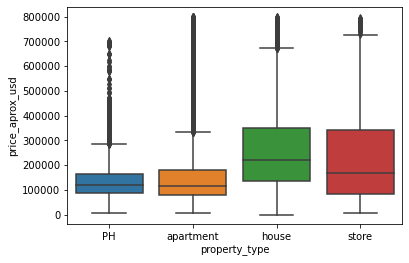

In [197]:
mask = data_final['price_aprox_usd'] < 800000
fig = sns.boxplot(data = data_final.loc[mask,['price_aprox_usd','property_type']], x ='property_type', y = 'price_aprox_usd')

In [80]:
bins = [0,100000,500000,1000000,65000000]

priceusd_categorias = pd.cut(data_final['price_aprox_usd'], bins, right=False, labels=['bajo ---> $0 a $100k','medio --->$100k a $500k','alto ---> $500k to $1MM',
                                                                                'muy alto ---> $1MM to $10MM'], ordered=True)
priceusd_categorias.value_counts()

medio --->$100k a $500k        59735
bajo ---> $0 a $100k           29900
alto ---> $500k to $1MM         6475
muy alto ---> $1MM to $10MM     2424
Name: price_aprox_usd, dtype: int64

In [169]:
data_final['property_type'].value_counts()

apartment    66519
house        39761
PH            5618
store         4071
Name: property_type, dtype: int64

- #### *Miramos la columna price_per_m2*

In [199]:
price_per_m2 = data_final['price_per_m2']

In [200]:
price_per_m2.describe()

count    8.565500e+04
mean     6.806705e+03
std      2.850105e+04
min      1.510204e+00
25%      1.538462e+03
50%      2.200000e+03
75%      3.333333e+03
max      4.000000e+06
Name: price_per_m2, dtype: float64

In [201]:
print('Nulos price_per_m2 --->',price_per_m2.isnull().sum())
print('Valores NO nulos price_per_m2 --->', price_per_m2.notnull().sum())

Nulos price_per_m2 ---> 30314
Valores NO nulos price_per_m2 ---> 85655


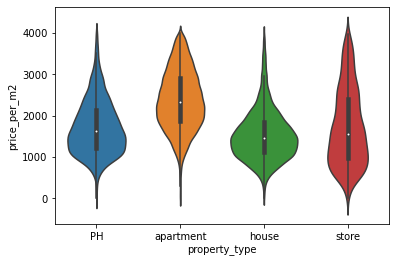

In [202]:
mask_priceperm2 = data_final['price_per_m2'] < 4000
fig = sns.violinplot(data = data_final.loc[mask_priceperm2,['price_per_m2','property_type']], x ='property_type', y = 'price_per_m2')

In [204]:
bins = [0,1600,2200,3400,4000]

priceusd_categorias = pd.cut(data_final['price_per_m2'], bins, right=False, labels=['bajo ---> $0 a $1600 per m2','medio --->$1600 a $2200 per m2','alto ---> $2200 a $3400 per m2',
                                                                                'muy alto ---> $3400 a $5000 per m2'], ordered=True)
priceusd_categorias.value_counts()

bajo ---> $0 a $1600 per m2           23342
alto ---> $2200 a $3400 per m2        22245
medio --->$1600 a $2200 per m2        19295
muy alto ---> $3400 a $5000 per m2     3996
Name: price_per_m2, dtype: int64